In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
from scipy.special import factorial
%matplotlib inline

In [2]:
def chi2(ymeasured,ytheory):
    # N = number of bins
    # ymeasured = Array of the measured number of counts in each bin
    # ytheory = Array of the predicted number of counts in each bin
    
    N = len(ymeasured)
    sigma = np.sqrt(ymeasured)
    for i in np.arange(0,N):
        if sigma[i] == 0:
            sigma[i] = 1
    
    
    
    return (1/N)*np.sum(np.array([((ymeasured[i]-ytheory[i])/sigma[i])**2 for i in np.arange(0,N)]))

# Constant Intensity

Variables are poorly named and multiply used.

In [3]:
def Poisson(n,nav):
    return (nav**n)*((factorial(n, exact=False))**(-1))*np.exp(-nav)

### Rate 1000

In [70]:
ThermR1000 = np.loadtxt('ConstantIntensity_Rate1000.csv',delimiter = ',');

In [5]:
np.max(ThermR1000)

7.0

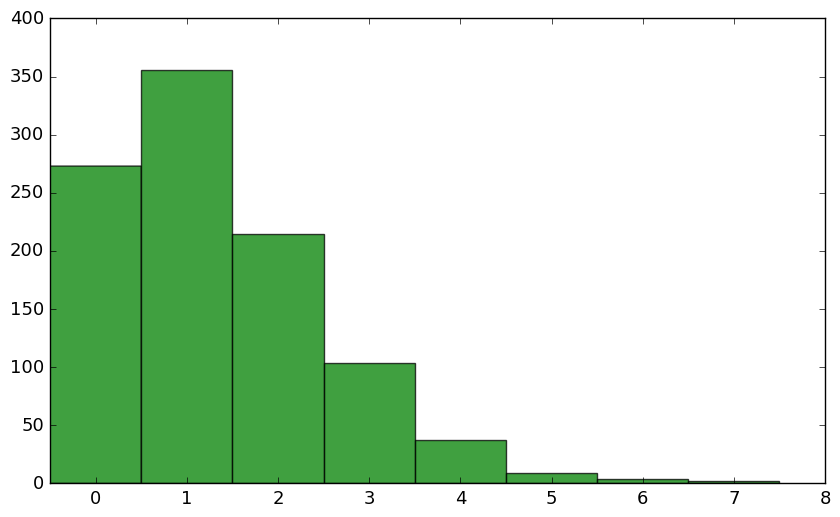

In [6]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

no, binso, patcheso = plt.hist(ThermR1000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR1000)+1);

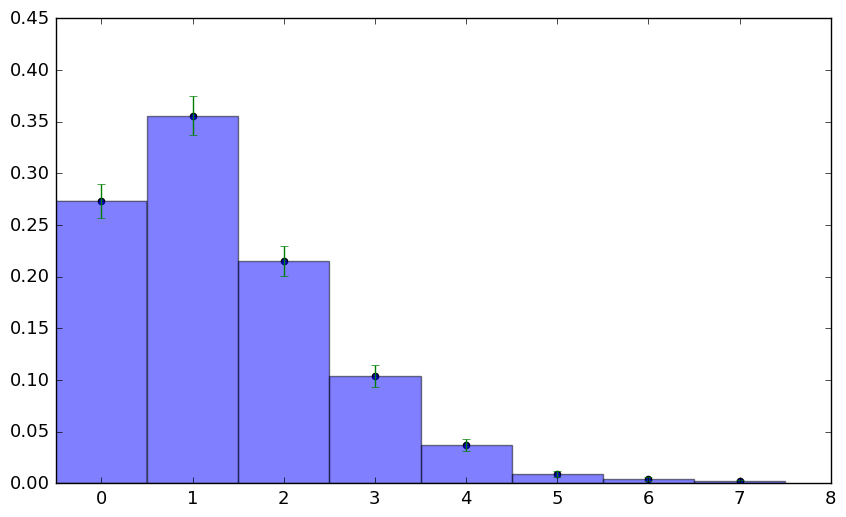

In [7]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR1000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

This data was collected in a time window of 1 ms. Need average number of photons counted in 1ms to continue.

In [8]:
n

array([ 0.273,  0.356,  0.215,  0.104,  0.037,  0.009,  0.004,  0.002])

In [9]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R1000 = np.sum(n*np.arange(0,np.max(ThermR1000)+1))
n_av_CI_R1000

1.329

In [10]:
unc_n_av_CI_R1000 = (1/1000)*np.sqrt(np.sum(ThermR1000))
unc_n_av_CI_R1000

0.03645545226711637

In [11]:
CHI_CIR1000 = chi2(no,Poisson(np.arange(0,np.max(ThermR1000)+1),n_av_CI_R1000)*1000)
CHI_CIR1000

0.55076137481786358

In [12]:
CHI_CIR1000/8

0.068845171852232948

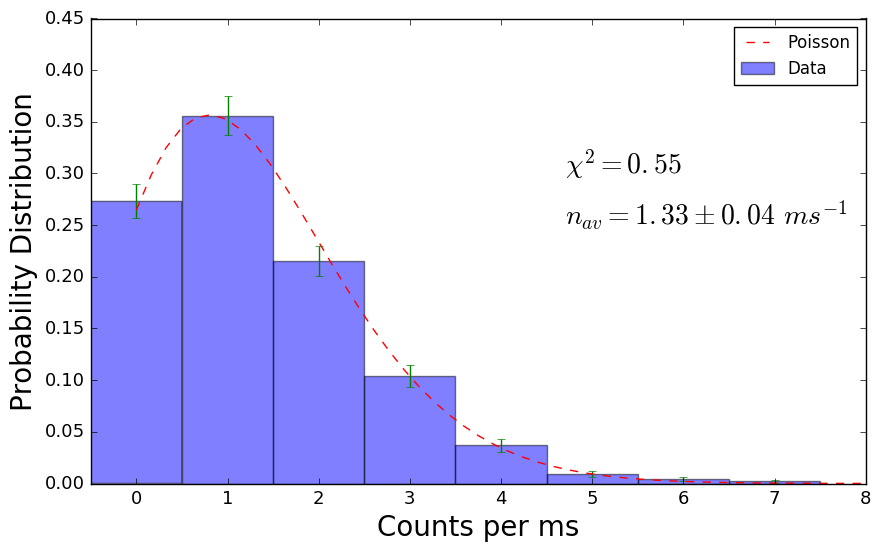

In [13]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');

plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')

plt.plot(np.linspace(0,np.max(ThermR1000)+1), Poisson(np.linspace(0,np.max(ThermR1000)+1),n_av_CI_R1000), 'r--', linewidth=1,label='Poisson')
plt.legend(loc='best')


plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

plt.text(4.7,0.3,'$\chi^2 = %.2f$ ' % (CHI_CIR1000),size=20)
plt.text(4.7,0.25,'$n_{av} = %.2f \pm %.2f$ $ms^{-1}$ ' % (n_av_CI_R1000,unc_n_av_CI_R1000),size=20)


plt.xlabel('Counts per ms',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('CIR1000.png')

### Rate 3000

In [14]:
ThermR3000 = np.loadtxt('ConstantIntensity_Rate3000.csv',delimiter = ',');

In [15]:
np.max(ThermR3000)

12.0

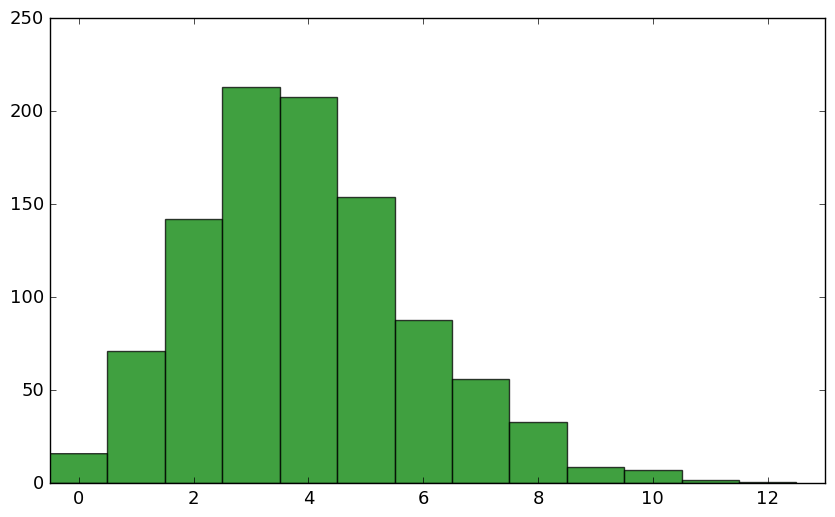

In [16]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

no, binso, patcheso = plt.hist(ThermR3000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR3000)+1);

In [17]:
len(no)

13

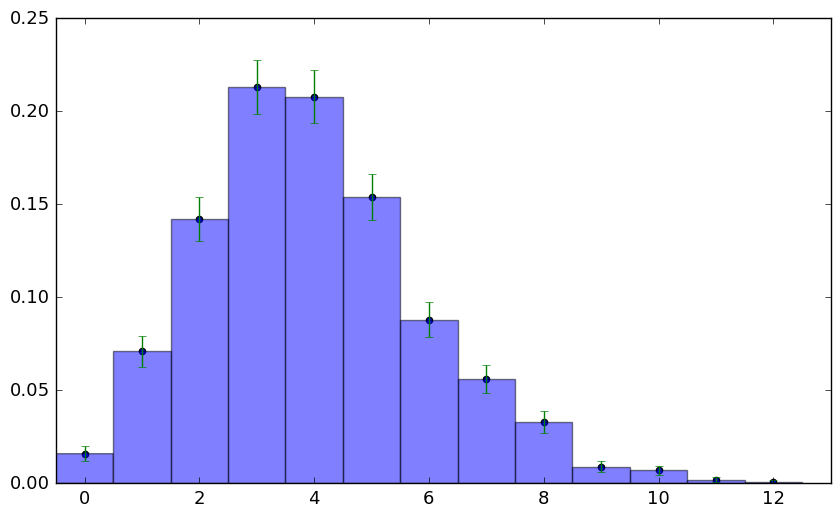

In [18]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR3000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

In [19]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R3000 = np.sum(n*np.arange(0,np.max(ThermR3000)+1))
n_av_CI_R3000

3.9649999999999999

In [20]:
unc_n_av_CI_R3000 = (1/1000)*np.sqrt(np.sum(ThermR3000))
unc_n_av_CI_R3000

0.062968245965724659

In [21]:
CHI_CIR3000 = chi2(no,Poisson(np.arange(0,np.max(ThermR3000)+1),n_av_CI_R3000)*1000)
CHI_CIR3000

0.6398657508282598

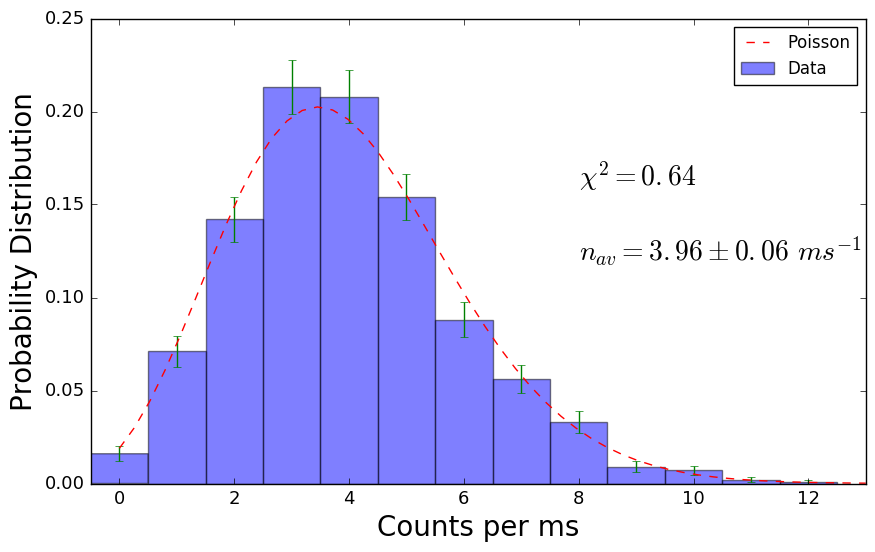

In [22]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR3000)+1), Poisson(np.linspace(0,np.max(ThermR3000)+1),n_av_CI_R3000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')
plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

plt.text(8,0.16,'$\chi^2 = %.2f$ ' % (CHI_CIR3000),size=20)
plt.text(8,0.12,'$n_{av} = %.2f \pm %.2f$ $ms^{-1}$ ' % (n_av_CI_R3000,unc_n_av_CI_R3000),size=20)

plt.xlabel('Counts per ms',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('CIR3000.png')

### Rate 10,000

In [23]:
ThermR10000 = np.loadtxt('ConstantIntensity_Rate10000.csv',delimiter = ',');

In [24]:
np.max(ThermR10000)

24.0

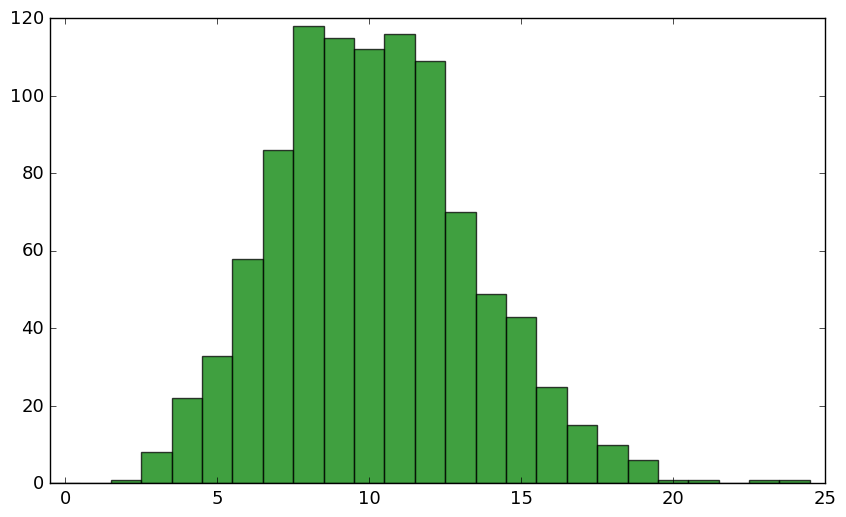

In [25]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

no, binso, patcheso = plt.hist(ThermR10000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR10000)+1);

In [26]:
len(no)

25

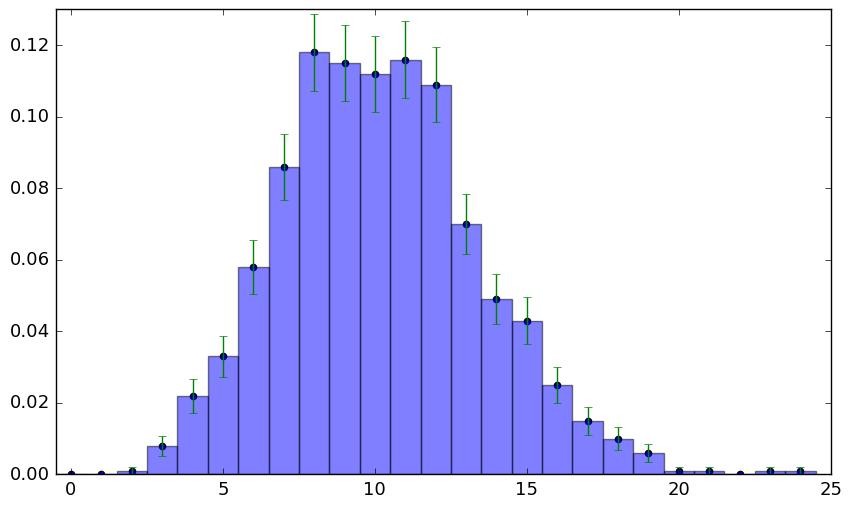

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR10000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.13);

In [28]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R10000 = np.sum(n*np.arange(0,np.max(ThermR10000)+1))
n_av_CI_R10000

10.19

In [29]:
unc_n_av_CI_R10000 = (1/1000)*np.sqrt(np.sum(ThermR10000))
unc_n_av_CI_R10000

0.10094552986635912

In [30]:
CHI_CIR10000 = chi2(no,Poisson(np.arange(0,np.max(ThermR10000)+1),n_av_CI_R10000)*1000)
CHI_CIR10000

0.5079198794036397

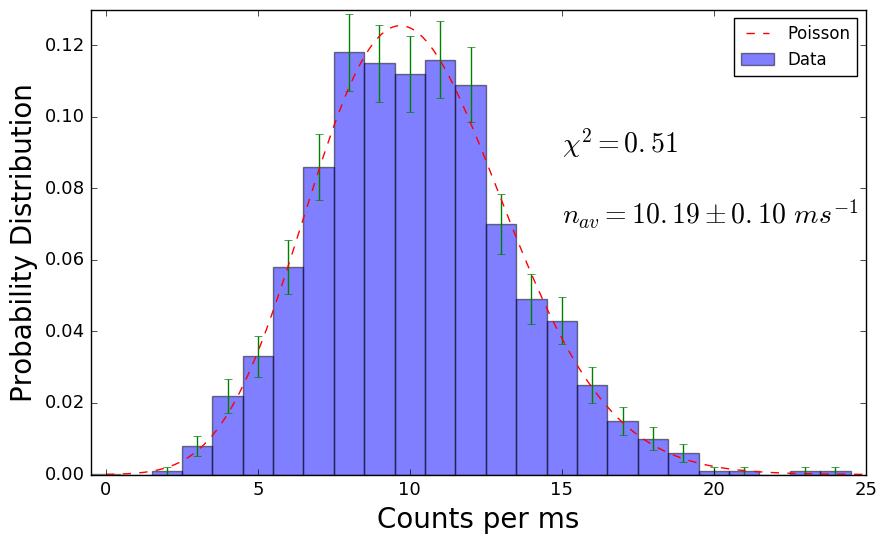

In [31]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR10000)+1,200), Poisson(np.linspace(0,np.max(ThermR10000)+1,200),n_av_CI_R10000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')
plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.13);

plt.text(15,0.09,'$\chi^2 = %.2f$ ' % (CHI_CIR10000),size=20)
plt.text(15,0.07,'$n_{av} = %.2f \pm %.2f$ $ms^{-1}$ ' % (n_av_CI_R10000,unc_n_av_CI_R10000),size=20)

plt.xlabel('Counts per ms',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('CIR10000.png')

# Psuedothermal Source

In [32]:
def BoseEin(n,nav):
    return (nav**n)/((nav + 1)**(n+1))

### Rate 1000

In [33]:
ThermR1000 = np.loadtxt('Therm_Rate1000.csv',delimiter = ',');

In [34]:
np.max(ThermR1000)

12.0

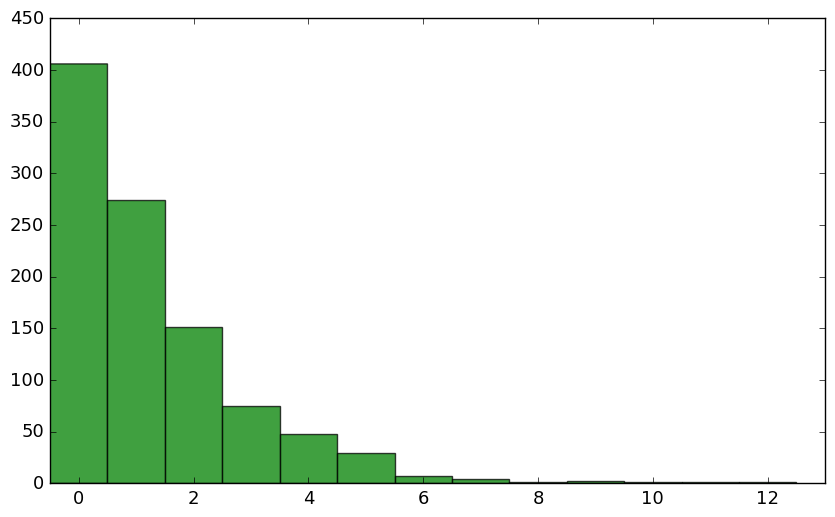

In [35]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

no, binso, patcheso = plt.hist(ThermR1000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR1000)+1);

In [36]:
len(no)

13

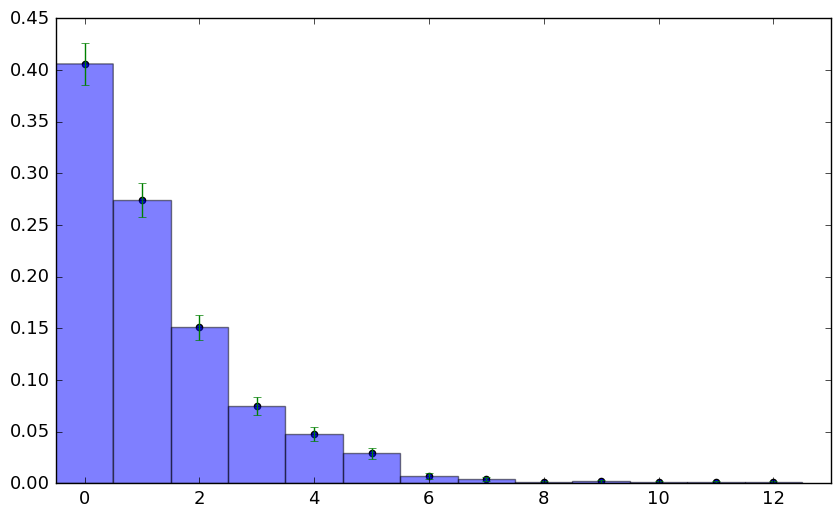

In [37]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR1000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

In [38]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R1000 = np.sum(n*np.arange(0,np.max(ThermR1000)+1))
n_av_CI_R1000

1.2669999999999999

In [39]:
unc_n_av_CI_R1000 = (1/1000)*np.sqrt(np.sum(ThermR1000))
unc_n_av_CI_R1000

0.035594943461115372

In [40]:
CHI_ThermR1000 = chi2(no,BoseEin(np.arange(0,np.max(ThermR1000)+1),n_av_CI_R1000)*1000)
CHI_ThermR1000

2.1680114946865223

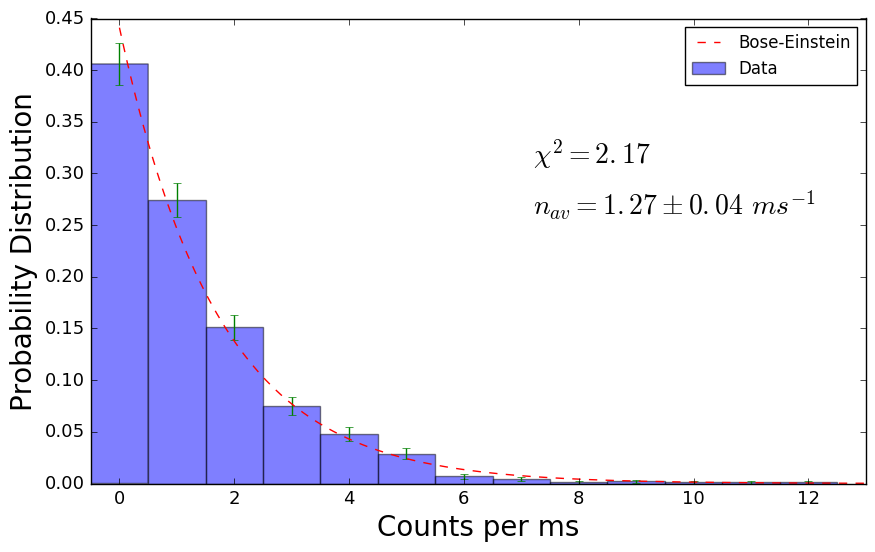

In [41]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR1000)+1,200), BoseEin(np.linspace(0,np.max(ThermR1000)+1,200),n_av_CI_R1000), 'r--', linewidth=1,label='Bose-Einstein')


plt.legend(loc='best')

plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

plt.text(7.2,0.31,'$\chi^2 = %.2f$ ' % (CHI_ThermR1000),size=20)
plt.text(7.2,0.26,'$n_{av} = %.2f \pm %.2f$ $ms^{-1}$ ' % (n_av_CI_R1000,unc_n_av_CI_R1000),size=20)

plt.xlabel('Counts per ms',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('ThermR1000.png')

### Rate 3000

In [42]:
ThermR3000 = np.loadtxt('Therm_Rate3000.csv',delimiter = ',');

In [43]:
np.max(ThermR1000)

12.0

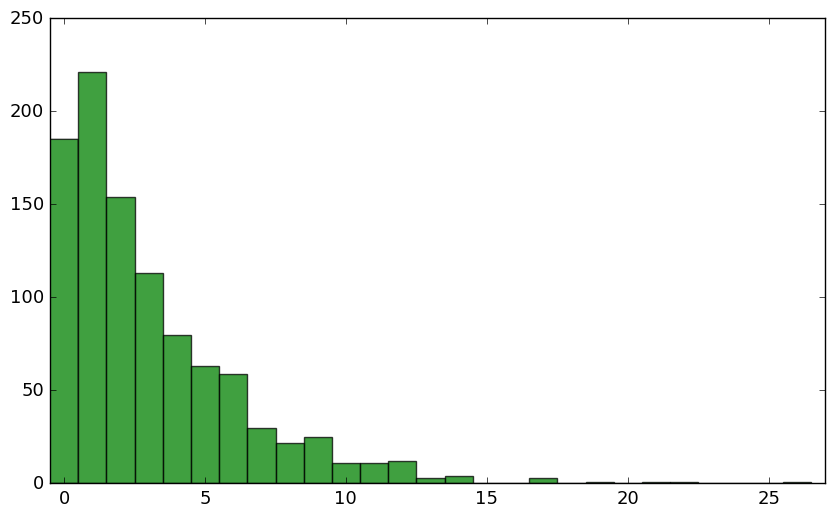

In [44]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

no, binso, patcheso = plt.hist(ThermR3000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR3000)+1);

In [45]:
len(no)

27

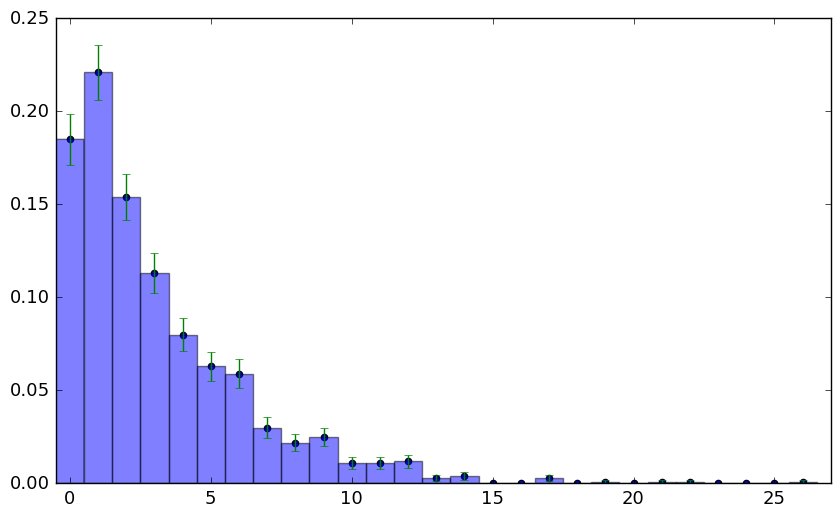

In [46]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR3000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

In [47]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R3000 = np.sum(n*np.arange(0,np.max(ThermR3000)+1))
n_av_CI_R3000

3.077

In [48]:
unc_n_av_CI_R3000 = (1/1000)*np.sqrt(np.sum(ThermR3000))
unc_n_av_CI_R3000

0.055470712993434652

In [49]:
CHI_ThermR3000 = chi2(no,BoseEin(np.arange(0,np.max(ThermR3000)+1),n_av_CI_R3000)*1000)
CHI_ThermR3000

2.3866423125870884

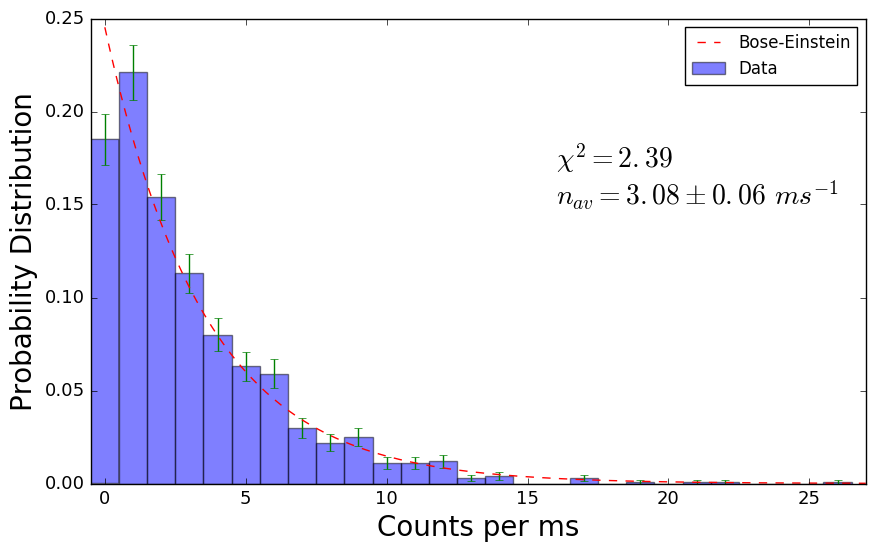

In [50]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR3000)+1,200), BoseEin(np.linspace(0,np.max(ThermR3000)+1,200),n_av_CI_R3000), 'r--', linewidth=1,label='Bose-Einstein')


plt.legend(loc='best')

plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

plt.text(16,0.17,'$\chi^2 = %.2f$ ' % (CHI_ThermR3000),size=20)
plt.text(16,0.15,'$n_{av} = %.2f \pm %.2f$ $ms^{-1}$ ' % (n_av_CI_R3000,unc_n_av_CI_R3000),size=20)

plt.xlabel('Counts per ms',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('ThermR3000.png')

### Rate 10,000

In [51]:
ThermR10000 = np.loadtxt('Therm_Rate10000.csv',delimiter = ',');

In [52]:
np.max(ThermR10000)

96.0

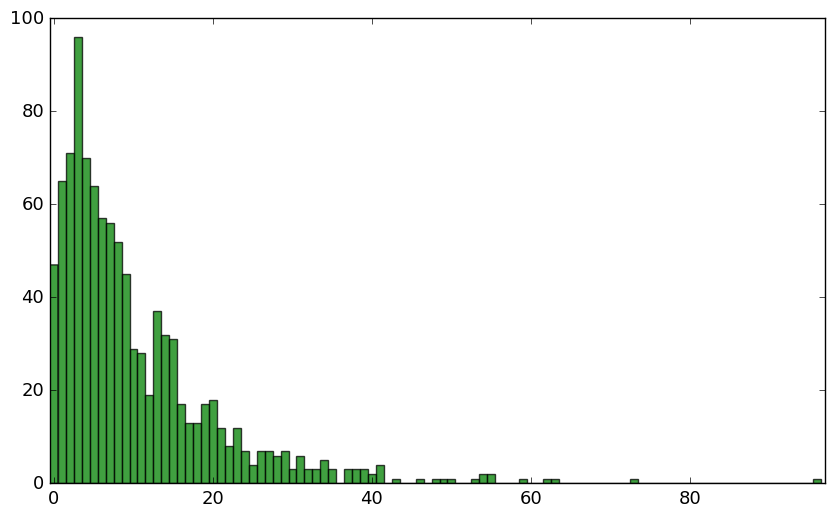

In [53]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

no, binso, patcheso = plt.hist(ThermR10000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR10000)+1);

In [54]:
len(no)

97

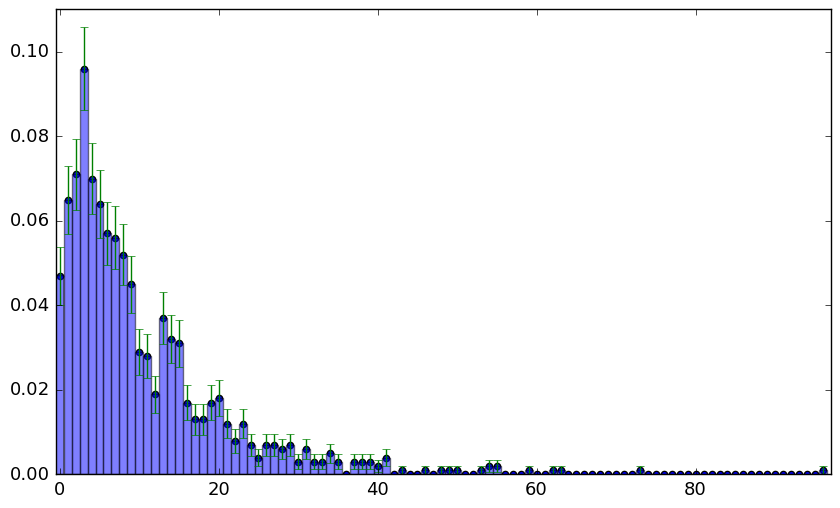

In [55]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR10000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.11);

In [56]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R10000 = np.sum(n*np.arange(0,np.max(ThermR10000)+1))
n_av_CI_R10000

10.186

In [57]:
unc_n_av_CI_R10000 = (1/1000)*np.sqrt(np.sum(ThermR10000))
unc_n_av_CI_R10000

0.10092571525632107

In [58]:
CHI_ThermR10000 = chi2(no,BoseEin(np.arange(0,np.max(ThermR10000)+1),n_av_CI_R10000)*1000)
CHI_ThermR10000

1.1986746354337972

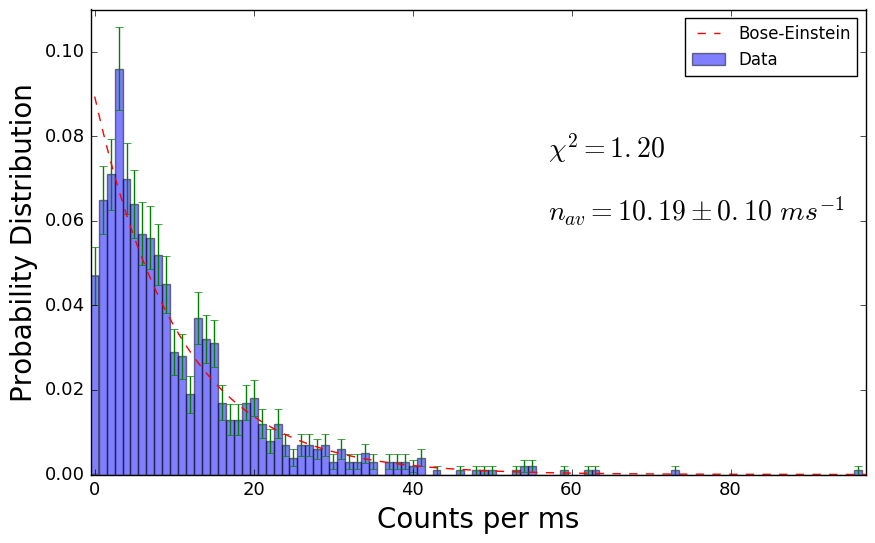

In [59]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR10000)+1,200), BoseEin(np.linspace(0,np.max(ThermR10000)+1,200),n_av_CI_R10000), 'r--', linewidth=1,label='Bose-Einstein')


plt.legend(loc='best')

plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.11);

plt.text(57,0.075,'$\chi^2 = %.2f$ ' % (CHI_ThermR10000),size=20)
plt.text(57,0.06,'$n_{av} = %.2f \pm %.2f$ $ms^{-1}$ ' % (n_av_CI_R10000,unc_n_av_CI_R10000),size=20)

plt.xlabel('Counts per ms',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('ThermR10000.png')

# Determining the discriminator level

In [60]:
V = np.array([-5,-10,-15,-20,-30,-40,-50,-60,-80,-100,-120]) #Discriminator voltage. 1s Counting
Counts = np.array([658984,549870,459153,346578,138705,28503,3638,889,381,191,130]) #photon counts
BkdCounts = np.array([32.4,23.5,21.9,21.5,18.5,14.2,13,7.5,2.4,0.4,0.2]) #bkd

RealCounts = Counts - BkdCounts #bkd subtracted

S2N = RealCounts/BkdCounts #Signal to noise ratio

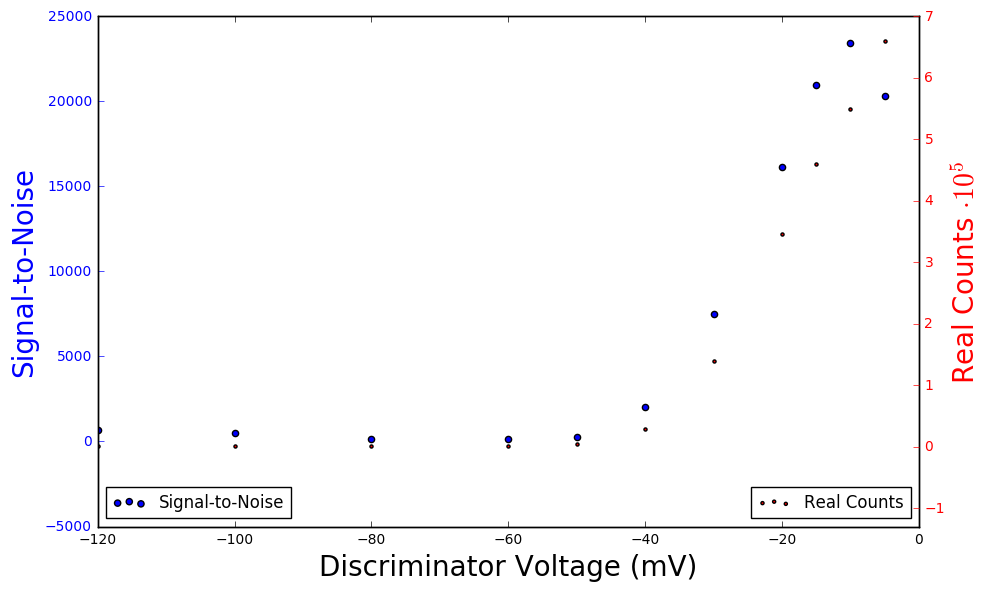

In [61]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(V, S2N,c='b',marker="o",label='Signal-to-Noise')
ax1.set_xlabel('Discriminator Voltage (mV)',size=20)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Signal-to-Noise', color='b',size=20)
ax1.tick_params('y', colors='b')
plt.legend(loc='lower left')
plt.xlim(-120,0)

ax2 = ax1.twinx()
ax2.scatter(V, RealCounts*1e-5,c='r',marker=".",label='Real Counts')
ax2.set_ylabel('Real Counts $\cdot 10^{5}$', color='r',size=20)
ax2.tick_params('y', colors='r')
plt.xlim(-120,0)
plt.ylim(-1.3,7)


fig.tight_layout()
plt.savefig('Discriminator.png')
plt.legend(loc='lower right')
plt.show()

# Pulse Observation

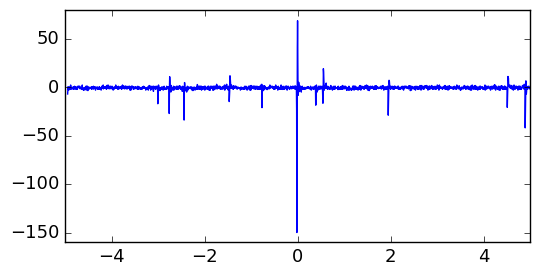

In [62]:
Const_I_1 = pd.read_excel('const_i_1.csv',skiprows=[0]);

Time1 = Const_I_1['second']
Volt1 = Const_I_1['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time1*1e6,Volt1*1e3)
plt.ylim(-160,80)
plt.xlim(-5,5);

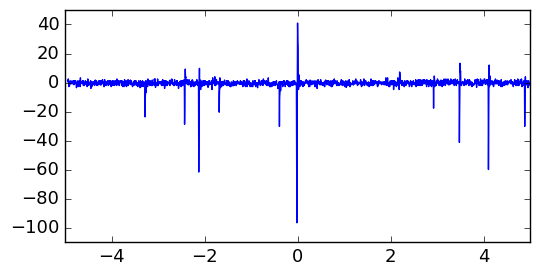

In [63]:
Const_I_2 = pd.read_excel('const_i_2.csv',skiprows=[0]);

Time2 = Const_I_2['second']
Volt2 = Const_I_2['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time2*1e6,Volt2*1e3)
plt.ylim(-110,50)
plt.xlim(-5,5);

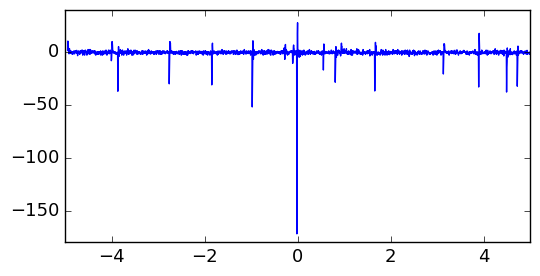

In [64]:
Const_I_3 = pd.read_excel('const_i_3.csv',skiprows=[0]);

Time3 = Const_I_3['second']
Volt3 = Const_I_3['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time3*1e6,Volt3*1e3)
plt.ylim(-180,40);
plt.xlim(-5,5);

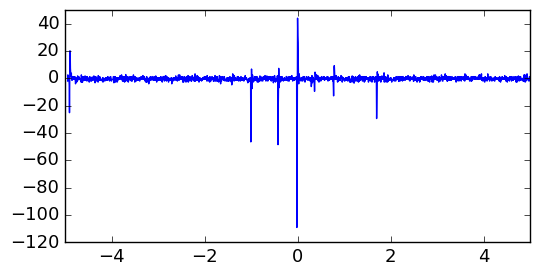

In [65]:
Const_I_4 = pd.read_excel('const_i_4.csv',skiprows=[0]);

Time4 = Const_I_4['second']
Volt4 = Const_I_4['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time4*1e6,Volt4*1e3)
plt.ylim(-120,50)
plt.xlim(-5,5);

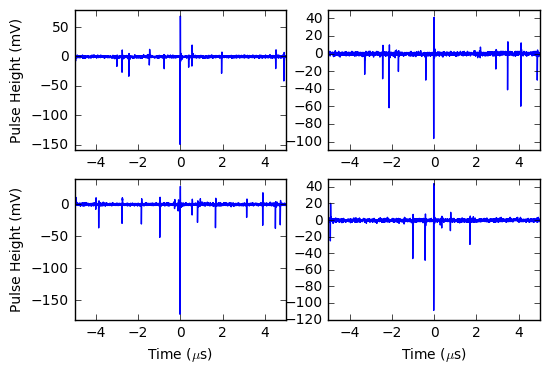

In [66]:
f, axarr = plt.subplots(2, 2);
axarr[0, 0].plot(Time1*1e6,Volt1*1e3);
#axarr[0, 0].set_xlabel('Time ($\mu$s)');
axarr[0, 0].set_ylabel('Pulse Height (mV)');
axarr[0, 0].set_xlim(-5,5);
axarr[0, 0].set_ylim(-160,80);

axarr[0, 1].plot(Time2*1e6,Volt2*1e3);
#axarr[0, 1].set_xlabel('Time ($\mu$s)');
#axarr[0, 1].set_ylabel('Pulse Height (mV)');
axarr[0, 1].set_xlim(-5,5);
axarr[0, 1].set_ylim(-110,50);

axarr[1, 0].plot(Time3*1e6,Volt3*1e3);
axarr[1, 0].set_xlabel('Time ($\mu$s)');
axarr[1, 0].set_ylabel('Pulse Height (mV)');
axarr[1, 0].set_xlim(-5,5);
axarr[1, 0].set_ylim(-180,40);

axarr[1, 1].plot(Time4*1e6,Volt4*1e3);
axarr[1, 1].set_xlabel('Time ($\mu$s)');
#axarr[1, 1].set_ylabel('Pulse Height (mV)');
axarr[1, 1].set_xlim(-5,5);
axarr[1, 1].set_ylim(-120,50);
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
fig.tight_layout()
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False);
plt.savefig('Pulses.png')

# Compare BE with P

In [67]:
def Poisson(n,nav):
    return (nav**n)*((factorial(n, exact=False))**(-1))*np.exp(-nav)

def BoseEin(n,nav):
    return (nav**n)/((nav + 1)**(n+1))

In [68]:
n = np.linspace(0,100)

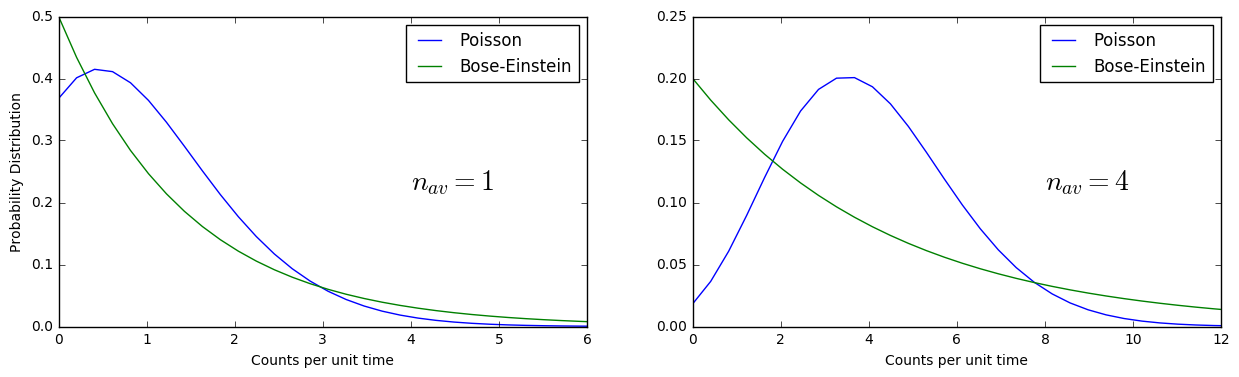

In [69]:
f, axarr = plt.subplots(1, 2,figsize=(15,4));
n = np.linspace(0,10)


plt.sca(axarr[0])
plt.plot(n,Poisson(n,1),label='Poisson');
plt.plot(n,BoseEin(n,1),label='Bose-Einstein');
#axarr[0, 0].set_xlabel('Time ($\mu$s)');
plt.ylabel('Probability Distribution');
plt.text(4,0.22,'$n_{av} = 1$',size=20)
plt.xlabel('Counts per unit time');
plt.xlim(0,6)
#axarr[0, 0].set_xlim(-5,5);
#axarr[0, 0].set_ylim(-160,80);
plt.legend()

plt.sca(axarr[1])
n = np.linspace(0,20)
plt.plot(n,Poisson(n,4),label='Poisson');
plt.plot(n,BoseEin(n,4),label='Bose-Einstein');
plt.xlim(0,12)
plt.xlabel('Counts per unit time');
plt.text(8,0.11,'$n_{av} = 4$',size=20)
#axarr[0, 1].set_xlabel('Time ($\mu$s)');
#axarr[0, 1].set_ylabel('Pulse Height (mV)');
#axarr[0, 1].set_xlim(-5,5);
#axarr[0, 1].set_ylim(-110,50);
plt.legend()


plt.savefig('BEPCompare.png')